# Notebook 09 - Binary Classification

__[Example Notebook]__

Note: the techniques I'm using to prepare the data aren't best practices, like:

- using max-scaling to normalize data
- the way I train test split
- not shuffling the test data

I'm just using quick and easy ways to prepare this data for use in the model, our goal here is just to showcase a working neural network :)

# repalce with moon data

In [1]:
import kaitorch

from kaitorch.models import Sequential
from kaitorch.layers import Dense, Dropout
from kaitorch.optimizers import SGD, Momentum, Nesterov
from kaitorch.losses import MeanSquaredError, BinaryCrossentropy, CategoricalCrossentropy
from kaitorch.graph import plot_model

from kaitorch.utils import as_onehot

#### Loading the Iris Dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

Using only the first 100 samples - the Iris dataset contains 3 classes each with 50 samples. So in order to perform binary classification we remove a class.

In [3]:
data['data'] = data['data'][:100]
data['data'] = data['data']/data['data'].max(axis=0)
data['target'] = data['target'][:100]

Imports for graphing, the Iris dataset has 4 input features and we can only visualize using 2 dimensions so we perform dimensionality reduction using PCA.

In [4]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cmx
from sklearn.decomposition import PCA

__Plotting the data__

In [5]:
def plot_iris(data): 

    X_pca = PCA(n_components=2).fit_transform(data.data)
    y = data.target

    plt.figure(figsize=(10,8))
    hot = plt.get_cmap('hot')
    cNorm  = colors.Normalize(vmin=0, vmax=len(data.target_names))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

    for i in range(len(data.target_names[:2])):
        s, e = i*50, (i+1)*50
        plt.scatter(
            X_pca[s:e, 0],
            X_pca[s:e, 1],
            s=50,
            color=scalarMap.to_rgba(i),
            label=data.target_names[i])

    plt.title("Iris Dataset after PCA (n_components=2)")
    plt.xlabel("1st eigenvector")
    plt.ylabel("2nd eigenvector")
    plt.legend(loc='lower right')

    plt.show()

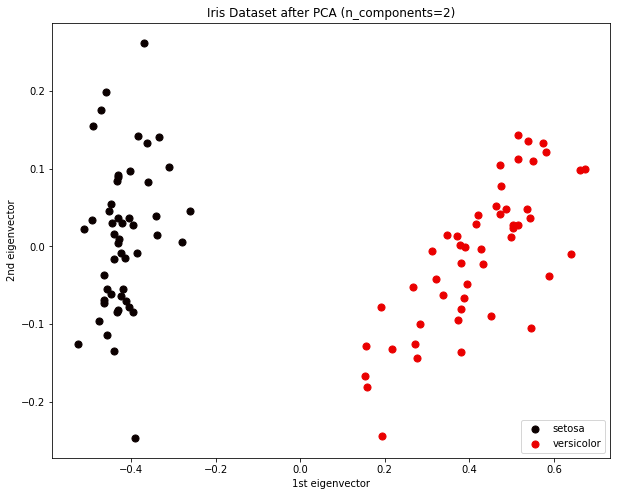

In [6]:
plot_iris(data)

__Train/Test split__

In [7]:
X_train = list(data['data'][:40]) + list(data['data'][50:90])
y_train = list(data['target'][:40]) + list(data['target'][50:90])

X_test = list(data['data'][40:50]) + list(data['data'][90:100])
y_test = list(data['target'][40:50]) + list(data['target'][90:100])

__Shuffle training data__

In [8]:
import random

shuffled_order = list(range(len(X_train)))
random.shuffle(shuffled_order)

X_train = [X_train[i] for i in shuffled_order]
y_train = [y_train[i] for i in shuffled_order]

__Building our model__

Let's try making a network with 3 hidden Dense layers with 16 units each. Each one using a `sigmoid` activation and `glorot_uniform` initializer (a commonly used pairing). Let's also use a 0.15 dropout between each hidden layer.

Since we are performing binary classification, we'll use a Dense output layer with 1 unit and a `sigmoid` activation, so that the final node takes a value between 0 and 1.

Lastly, we'll compile it with a `Momentum` optimizer and `BinaryCrossentropy` loss function.

In [22]:
model = Sequential()

model.add(Dense(20, activation='ReLU', initializer='glorot_uniform'))
model.add(Dropout(0.15))
model.add(Dense(20, activation='ReLU', initializer='glorot_uniform'))
model.add(Dropout(0.15))
model.add(Dense(20, activation='ReLU', initializer='glorot_uniform'))
model.add(Dense(4, activation='ReLU', initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=kaitorch.optimizers.Adam(lr=0.03),
    loss=kaitorch.losses.BinaryCrossentropy()
)

In [23]:
model.build(input_size=4)
model.summary()

___________________________________________________________________________________________________________________
Layer (params)                                                           Output Shape     Params = Weights + Biases
Dense(units=20, activation=ReLU, initializer=glorot_uniform)             (None, 20)       100      80        20    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.15)                                               (None, 20)       0        0         0     
___________________________________________________________________________________________________________________
Dense(units=20, activation=ReLU, initializer=glorot_uniform)             (None, 20)       420      400       20    
___________________________________________________________________________________________________________________
Dropout(dropout_rate=0.15)                                              

In [24]:
%%time
history = model.fit(X_train, y_train, epochs=30)

Epoch  30/30: 100%|████████████████████████████████████████| 80/80 [00:03<00:00, Train Loss: 1.1859]


CPU times: user 1min 36s, sys: 6.64 s, total: 1min 43s
Wall time: 1min 56s


In [ ]:
y_pred = model.predict(X_test)
y_pred = [round(pred) for pred in y_pred]

In [ ]:
y_test

In [ ]:
def print_accuracy(y_test, y_pred):
    
    matches = [test == pred for test, pred in zip(y_test, y_pred)]
    
    accuracy_dec = sum(matches)/len(matches)
    
    accuracy_pct = f'{100*accuracy_dec:.4}%'

    print(f'Accuracy: {accuracy_pct}')

In [ ]:
print_accuracy(y_test, y_pred)

__Model Visualization__

If you'd like to see all the gradients flowing through the model, adjust the `fit()` function in `models.py` to return `y_pred` and run `plot_model()` on it. Here all our gradients are zeroed out because we aren't training the model - we're are only doing a forward pass, no backprop.

In [ ]:
y_pred = model.predict(X_test, as_scalar=True)
plot_model(y_pred[0])